# Day 1

## Numpy Vectorization

Most operations are done element-wise i.e. using for loops such as

In [2]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

out = []

for i in range(len(a)):
    out.append(a[i] + b[i])
out

[5, 7, 9]

The sum product of array a and b are calculated by summing each 'element' of each array, hence the term element-wise. Whereas, a vectorized operation would operate every element in the array simultaneously.

In [3]:
a + b

array([5, 7, 9])

By using vectorization, more complex arrays or other datas can be operated more effieciently thanks to **The Broadcasting Rule**. The rule states that an array can be broadcasted to another array for each missing length the first array has, but the other length of the two arrays must have the same size. An example of this is

In [4]:
A = np.array([[0, 0, 0],
             [1, 1, 1],
             [2, 2, 2],
             [3, 3, 3]])

A + b

array([[4, 5, 6],
       [5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

It can be seen that array b is broadcasted to each row of array A. A vectorized operation can also be done by using a boolean opearot that can result in a boolean array. An example of this is shown as

In [5]:
a > 1

array([False,  True,  True])

In [6]:
A+b > 6

array([[False, False, False],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True,  True]])

Sometimes the data used needs to be standardized first. It can be done by using the equation

$$
x' = \frac{x-\bar{x}}{\sigma}
$$

In [7]:
c = np.array([1, 2, 3, 4, 5, 6])

(c - c.mean())/c.std()

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

## Functions

Functions can be made in python by using the 'def' command. For each functions made there must be corresponding arguments for the function to connect a value inserted and the operation done

In [8]:
def append_list(lst, lst_val):
    for i in range(len(lst_val)):
        lst.append(lst_val[i])
    return lst

lst = ["This", "is"]
add_list = ["a", "python", "list"]


append_list(lst, add_list)
lst

['This', 'is', 'a', 'python', 'list']

There are positional arguments that can be used for functions, which are args and kwargs. args are used for taking elements from lists and kwargs are used for taking elements from a dictionary. The difference between the two of these are the operator * and ** are used for taking elements from a list and dictionary, respectively.

## Decorators

Decorators are used to add functionality to a function that is created in python. By using decorators, it won't the function that has been created. Take this decorator function as an example.

In [9]:
def decorator_func(func):
    def wrapper_func():
        print('This wrapper goes before the function below')
        return func()
    return wrapper_func

Next, we create a function to use the decorator with.

In [10]:
def some_func():
    print('This is the function')

some_func()

This is the function


By adding the decorator before the function is used, the results will be.

In [11]:
@decorator_func
def deco_func():
    print('This is the function with decorator')

deco_func()

This wrapper goes before the function below
This is the function with decorator


It is shown here that the function that we created has another functionality that can be added through the wrapper function.

## Differential Equation Analysis

### Euler Method

Euler's method for differential equation analysis is to approximate the value ODEs by iterating the differential function to its initial value. Consider the following equation.

$$
\frac{dx(t)}{dt} = f(x(t),t)
$$

Assume that the function has an initial value of $x$ = $x_0$. The euler method to find the value from the equation will be iterated with the function itself multiplied by a step size of h. The function of the approximation x* is

$$
x^*(t) = x_0 + h.f(x(t),t)
$$

The smaller the value of $h$ the more accurate it gets, but there needs to be a consideration in choosing a small $h$ because the calculation time will increase as the smaller h gets.

### Runge Kutta 4th Order

Runge Kutta approximates the value of an ODE by iterating the initial value with four values which are $k_1$, $k_2$, $k_3$, $k_4$.

$$k_1 = f(x^*(t_0), t_0) \\
k_2 = f(x^*(t_0) + k_1\frac{h}{2}, t_0 + \frac{h}{2}) \\
k_3 = f(x^*(t_0) + k_2\frac{h}{2}, t_0 + \frac{h}{2}) \\
k_4 = f(x^*(t_0) + k_3h, t_0 + h)$$

The estimation value of the ODE based on the four values of k is determined by the function below.

$$
x^*(t_0 + h) = x^*(t_0) + h.\frac{k_1 + 2k_2 + 2k_3 + k_4}{6}
$$

The method works similarly to a weighted function shown by the value that are multiplied to each $k$. 

In [12]:
# Python class for both method
class diff_eq:
    def __init__ (self, t0, x0, target, step):
        self.t0 = t0
        self.x0 = x0
        self.target = target
        self.h = step
        self.xval = 0
        print("Values received")
        
    # Euler Method
    def euler(self, function):
        # Initiate the value of x
        self.xval = self.x0
        
        # Iterate until the value of t reaches the target t
        while self.t0 < self.target:
            self.xval = self.xval + self.h*function(self.t0, self.x0)
            self.t0 = self.t0 + self.h
        # Returns the value of x
        return self.xval
        
    # Runge Kutta 4th Order Method
    def rk4(self, function):
        # Number of iterations based on step size
        self.n = int((self.target - self.t0)/self.h)
        # Initiate the value of x
        self.xval = self.x0
            
        # Iterate until the value of t reaches the target t
        for i in range(1, self.n+1):
            # Runge Kutta formulas for each k
            k1 = self.h * function(self.t0, self.xval) 
            k2 = self.h * function(self.t0+0.5*self.h, self.xval+0.5*k1) 
            k3 = self.h * function(self.t0+0.5*self.h, self.xval+0.5*k2) 
            k4 = self.h * function(self.t0+self.h, self.xval+k3)
            
            # Update values
            self.xval = self.xval + 1.0*(k1 + 2 * k2 + 2 * k3 + k4)/6.0
            self.t0 = self.t0 + self.h
        return self.xval

In [13]:
def dxdy(t, x):
    return ((t - x)/2)

# Euler method test
euval = diff_eq(0, 1, 2, 0.2)
print("The value by using euler method: " + str(euval.euler(dxdy)))

# Runge kutta method test
rkval = diff_eq(0, 1, 2, 0.2)
print("The value by using runge kutta method: " + str(rkval.rk4(dxdy)))

Values received
The value by using euler method: 0.9999999999999999
Values received
The value by using runge kutta method: 1.1036393232374955


# Day 2

## Truncation Error

Assume that there exists an equation of x which is stated as

$$
x' = \frac{dx}{dt} = f(x,t)
$$

When using the euler method for calculating the approximation value of x, there will be an error generated because of the approximation. The error generated is called as the **Truncation Error**. For the equation above, the truncation error by using the euler method for approximation for each step of iteration is stated as

$$
O(h^2) = \frac{h^2}{2}x''(\tilde{t_i})
$$

Where the value of x'' is the second order derivation of x by t, or in other form it is stated as

$$
x''(t_i) = f_t(t,x(t)) + f_x(t,x(t))f(t,x(t))
$$

$f_t$ and $f_x$ are both the partial derivation of the equation by t and x respectively. The value of $\tilde{t_i}$ is the number between $x_i$ and $x_{i+1}$, hence

$$
\tilde{x_i} = \frac{x_{i+1}-x_i}{2}
$$

Seeing that $x'$ is equal to $f(x,t)$, hence the formula of $O(h^2)$ can also be written as

$$
O(h^2) = \frac{h^2}{2}f'(x_i,t_i)
$$

The truncation error of the euler method is defined by $O(h^2)$. Whereas for a higher order the truncation error, say an order of $n$, it would change the truncation error equation to $O(h^{n+1})$. The formula of $O(h^n)$ is stated as

$$
O(h^n) = \frac{h^n}{n!}f^{(n-1)}(x_i,t_i)
$$

Referring back to the RK4 method, based on its name, we can determine that it would have a truncation error of $n+1$ based on its order. Hence, the truncation error of the RK4 method would be $O(h^5)$.

## Numba Test

In [14]:
import numpy as np
from numba import njit, jit

# Euler Method
def euler(t0, x0, target, h, function):
    # Initiate the value of x
    xval = x0
    
    # Iterate until the value of t reaches the target t
    while t0 < target:
        xval = xval + h*function(t0, x0)
        t0 = t0 + h
    # Returns the value of x
    return xval

@njit
def eu_dec(t0, x0, target, h, function):
    # Initiate the value of y
    xval = x0
        
    # Iterate until the value of x reaches the target x
    while t0 < target:
        xval = xval + h*function(t0, x0)
        t0 = t0 + h
    # Returns the value of y
    return xval

@njit
def func(t, x):
    return((t-x)/2)

# First compile with random inputs
eu_dec(1, 1, 2, 0.5, func)

1.125

In [15]:
%timeit euler(0, 1, 7, 0.05, func)

41.9 µs ± 3.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%timeit eu_dec(0, 1, 7, 0.05, func)

10.9 µs ± 328 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Day 3

## Transfer Function

Consider the following transfer function.

$$
\displaystyle{G(s) = \frac{1}{s^3+3s^2+2s+1}}
$$

By using the control library, the transfer function will now be simulated to check the step response.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import control as co
from numba import njit, jit, prange
%matplotlib inline

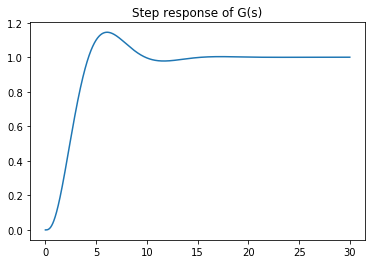

In [18]:
# Create the transfer function
sys = co.tf([1],[1, 3, 2, 1])

# Define the time interval 0.01 s time step
t = np.arange(int(30/0.01))*0.01

# Plot the step response of the system
T, yout = co.step_response(sys, t)
plt.title("Step response of G(s)")
plt.plot(T, yout)
plt.show()

## Dynamics

Next, the dynamics of the system will be simulated by creating a function based on the state space equation of G(s). Consider that the state space equation of the system is written as
$$
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
$$
$$
\mathbf{y} = \mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
$$

In [19]:
# Change from s-domain to state space
sys_ss = co.tf2ss(sys)
sys_ss

A = [[-3. -2. -1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]

B = [[1.]
 [0.]
 [0.]]

C = [[0. 0. 1.]]

D = [[0.]]

Based on the values of A, B, C, and D, the dynamics of the system can now be determined.

In [20]:
A = np.array(sys_ss.A)
B = np.array(sys_ss.B)
C = np.array(sys_ss.C)
D = np.array(sys_ss.D)

def dynamics(x, u):
    # Apply the state space equation for x dot
    x_dot = np.ravel(np.dot(A, x))+ np.ravel(np.dot(B, u))
    
    return x_dot

# Create a jitted function of the original dynamics function
dynamics_jitted = njit(dynamics)

In [21]:
# Compile the jitted function
# Use float to ensure the function will accept float as inputs
_ = dynamics_jitted(np.arange(3)*1.0, np.array([2.0]))

In [22]:
# Time test for both method
%timeit dynamics(np.arange(3)*1.0, np.array([3.0]))
%timeit dynamics_jitted(np.arange(3)*1.0, np.array([3.0]))

10.6 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.43 µs ± 50.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Euler Method

Based on the dynamics function, now the value of $\dot{x}$ can be approximated by using the euler method.

In [23]:
def sim_euler(t, u, x0):
    # Initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    for i in range(t.shape[0] - 1):
        x[i+1] = x[i] + (t[i+1]-t[i])*dynamics(x[i], u[i])
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

# Test the output of the function
a = 1.0*np.arange(10)
b = 2.0*np.ones((10,1))
c = 0.0*np.zeros((3,1))
out1, out2 = sim_euler(a, b, c)
print(out1.shape)
print(out2.shape)

(10, 3)
(10, 1)


In [24]:
# Create a jitted function based on the euler method function
@njit
def sim_euler_jitted(t, u, x0):
    # Don't forget to initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))

    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))

    for i in range(t.shape[0] - 1):
        x[i+1] = x[i] + (t[i+1]-t[i])*dynamics_jitted(x[i], u[i])
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

# Compile the jitted function and use float as inputs
_ = sim_euler_jitted(a, b, c)

In [25]:
# Time test for both methods
t = np.arange(int(30/0.01))*0.01 # 30 seconds with 0.01 s time-step
u = np.ones((t.shape[0], 1)) # Step Input
x0 = np.zeros((3, 1))

%timeit _ = sim_euler(t, u, x0)
%timeit _ = sim_euler_jitted(t, u, x0)

54.4 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.64 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
_, result_euler = sim_euler(t, u, x0)
_, result_euler_jitted = sim_euler_jitted(t, u, x0)

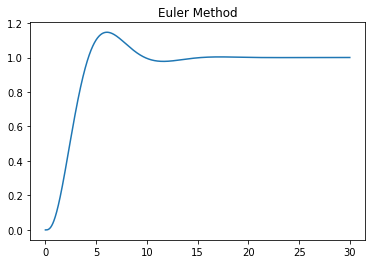

In [27]:
plt.plot(t, result_euler)
plt.title("Euler Method")
plt.show()

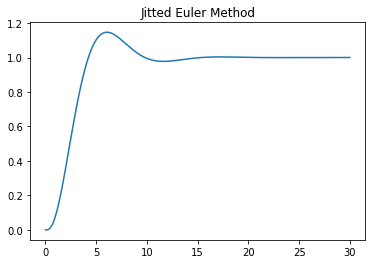

In [28]:
plt.plot(t, result_euler)
plt.title("Jitted Euler Method")
plt.show()

## Runge Kutta 4th Order Method

To approximate using the runge kutta method first the function will be defined below.

In [29]:
def sim_rk4(t, u, x0):
    # Initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    for i in range(t.shape[0] - 1):
        h = t[i+1]-t[i]
        k1 = h*dynamics(x[i], u[i])
        k2 = h*dynamics(x[i]+k1*h/2, u[i])
        k3 = h*dynamics(x[i]+k2*h/2, u[i])
        k4 = h*dynamics(x[i]+k3*h, u[i])
        
        x[i+1] = x[i] + 1.0*(k1 + 2*k2 + 2*k3 + k4)/6.0
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

# Test the output of the function
a = 1.0*np.arange(10)
b = 2.0*np.ones((10,1))
c = 0.0*np.zeros((3,1))
out1, out2 = sim_rk4(a, b, c)
print(out1.shape)
print(out2.shape)

(10, 3)
(10, 1)


In [30]:
@njit
def sim_rk4_jitted(t, u, x0):
    # Initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    for i in range(t.shape[0] - 1):
        h = t[i+1]-t[i]
        k1 = h*dynamics_jitted(x[i], u[i])
        k2 = h*dynamics_jitted(x[i]+k1*h/2, u[i])
        k3 = h*dynamics_jitted(x[i]+k2*h/2, u[i])
        k4 = h*dynamics_jitted(x[i]+k3*h, u[i])
        
        x[i+1] = x[i] + 1.0*(k1 + 2*k2 + 2*k3 + k4)/6.0
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

In [44]:
# Time test for both methods
t = np.arange(int(30/0.01))*0.01 # 30 seconds with 0.01 s time-step
u = np.ones((t.shape[0], 1)) # Step Input
x0 = np.zeros((3, 1))

%timeit _ = sim_rk4(t, u, x0)
%timeit _ = sim_rk4_jitted(t, u, x0)

185 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.6 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit _ = sim_euler(t, u, x0)
%timeit _ = sim_euler_jitted(t, u, x0)

54.6 ms ± 907 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.69 ms ± 66.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


It can be seen here that the RK4 method has a bit of disadvantage on the total running time, but the overall time difference between using a jitted function and the original function, the RK4 method is more efficient than the euler method.

In [33]:
_, result_rk4 = sim_euler(t, u, x0)
_, result_rk4_jitted = sim_euler_jitted(t, u, x0)

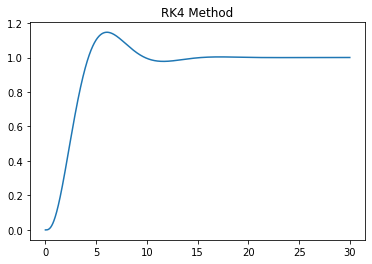

In [34]:
plt.plot(t, result_rk4)
plt.title("RK4 Method")
plt.show()

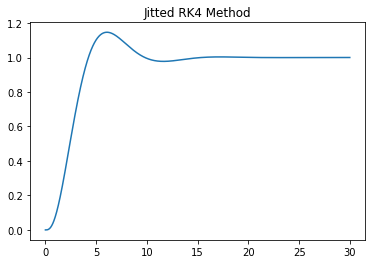

In [35]:
plt.plot(t, result_rk4_jitted)
plt.title("Jitted RK4 Method")
plt.show()

# Day 4

## Multi-Sim Euler Method

By creating a new function, the euler method can be done multiple times to simulate a change of input size. The function that will be used to iterate the euler method for a number of times is defined below. Another addition to the function is that the 'for' uses prange as a parameter to ensure that the jitted function can be run parallelly. By setting the jitted function to parallel, each iteration in the 'for' range will be run parallel to each other.

In [79]:
def multi_sim_euler(t, u, x0):
    # Define the output with one extra dimension as the iteration of multiple simulation
    x = np.empty((t.shape[0], t.shape[1], x0.shape[1]))
    y = np.empty((t.shape[0], t.shape[1], 1))
    
    for i in prange(t.shape[0]):
        x[i], y[i] = sim_euler_jitted(t[i], u[i], x0[i])
        x[i], y[i] = sim_euler_jitted(t[i], u[i], x0[i])
        x[i], y[i] = sim_euler_jitted(t[i], u[i], x0[i])
        
    return x, y

# Define a random input for compiling
t = np.tile(np.arange(int(30/0.01))*0.01,(10, 1))
print(t.shape)
x0 = np.tile(np.zeros((1, 1)), (10, 3, 1))
print(x0.shape)
u = np.tile(np.ones((t.shape[1], 1)),(10, 1, 1)) # Step Input
print(u.shape)

multi_sim_euler_jitted = njit(multi_sim_euler)
multi_sim_euler_jitted_parallelized = njit(multi_sim_euler, parallel = True)

_ = multi_sim_euler_jitted(t, u, x0) 
_ = multi_sim_euler_jitted_parallelized(t, u, x0) 

(10, 3000)
(10, 3, 1)
(10, 3000, 1)


In [83]:
t = np.tile(np.arange(int(300/0.01))*0.01,(10, 1))
print(t.shape)
x0 = np.tile(np.zeros((1, 1)), (10, 3, 1))
print(x0.shape)
u = np.tile(np.ones((t.shape[1], 1)),(10, 1, 1)) # Step Input
print(u.shape)

# Create a step input u with values that ranges from 1 to 10
for i in range(u.shape[0]):
    u[i] = u[i]*i+1

%timeit multi_sim_euler_jitted(t, u, x0)
%timeit multi_sim_euler_jitted_parallelized(t, u, x0)

(10, 30000)
(10, 3, 1)
(10, 30000, 1)
1.67 s ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.19 s ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
x, y = multi_sim_euler_jitted_parallelized(t, u, x0) 

After obtaining the data by using the multi sim euler function, next the data will be plotted on one chart for comparison

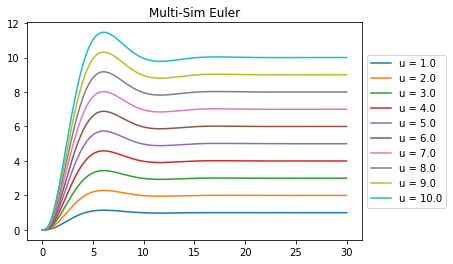

In [73]:
label = ["1.0", "2.0", "3.0", "4.0", "5.0", "6.0",
        "7.0", "8.0", "9.0", "10.0"]

plt.figure()
plt.title("Multi-Sim Euler")
for i in range(t.shape[0]):
    plt.plot(t[i], y[i], label = str("u = ") + label[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Day 5

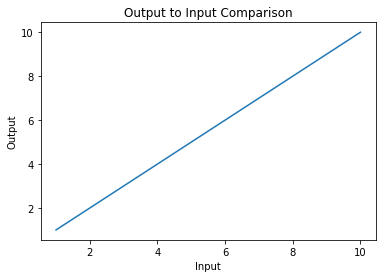

In [96]:
plt.title('Output to Input Comparison')
plt.plot(u[:,-1,0], y[:,-1,0])
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

Based on the plot above, the last data from the output array is plotted in comparison to the input size. It can be seen that when the input is increased linearly so does the output.